## Context

Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.

Objective is to identify different segments in the existing customers based on their spending patterns and past interaction with the bank. 

- Number of different segments of customers;
- Difference in these segments; & 
- Recommendations to the bank on how to better market to and service these customers. 

In [42]:
# Import different libraries 

import warnings
warnings.filterwarnings('ignore')

import numpy as np  
import pandas as pd

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt   
import seaborn as sns

from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))


In [43]:
# Read the dataset and making dataframe from the excel file

data = pd.read_excel("Credit Card Customer Data.xlsx")

data_copy = data.copy()

### Exploratory data quality report

In [44]:
# Display the dataset along with the number of rows and columns

print('Shape of the data:',data.shape,'\n') # Displays the dimension of the dataframe

display(data.head())

print('\n\nThe number of rows in the file are ', data.shape[0])
print('\n\nThe number of columns in the file are ', data.shape[1])

Shape of the data: (660, 7) 



,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3




The number of rows in the file are  660


The number of columns in the file are  7


In [45]:
# Check the data types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


` All the data types are integer types - thus the values are numeric.`

In [46]:
# Check for the null or na values in the dataset

if(data.isnull().any().any() and (data.isna().any().any())):
    print('There are null or nan values in the dataset')
else:
    print('There are no null or nan values in the dataset')    

display(data.isnull().any(), data.isna().sum())

There are no null or nan values in the dataset


Sl_No                  False
Customer Key           False
Avg_Credit_Limit       False
Total_Credit_Cards     False
Total_visits_bank      False
Total_visits_online    False
Total_calls_made       False
dtype: bool

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [47]:
# Check the number of uniques entries for each column

print('\nNumber of unique entries in each columns are: ')
data.nunique()


Number of unique entries in each columns are: 


Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [48]:
# Check for duplicate data

dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


` No duplicates are found.`

In [49]:
# Description of the attributes

data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.50,190.67,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.44,25627.77,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.24,37625.49,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.71,2.17,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.40,1.63,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.61,2.94,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.58,2.87,0.0,1.00,3.0,5.00,10.0


### Serial Number and the Customer Key can be removed.

In [50]:
data.drop(['Sl_No','Customer Key'], axis=1, inplace=True)

### Visualing the variables

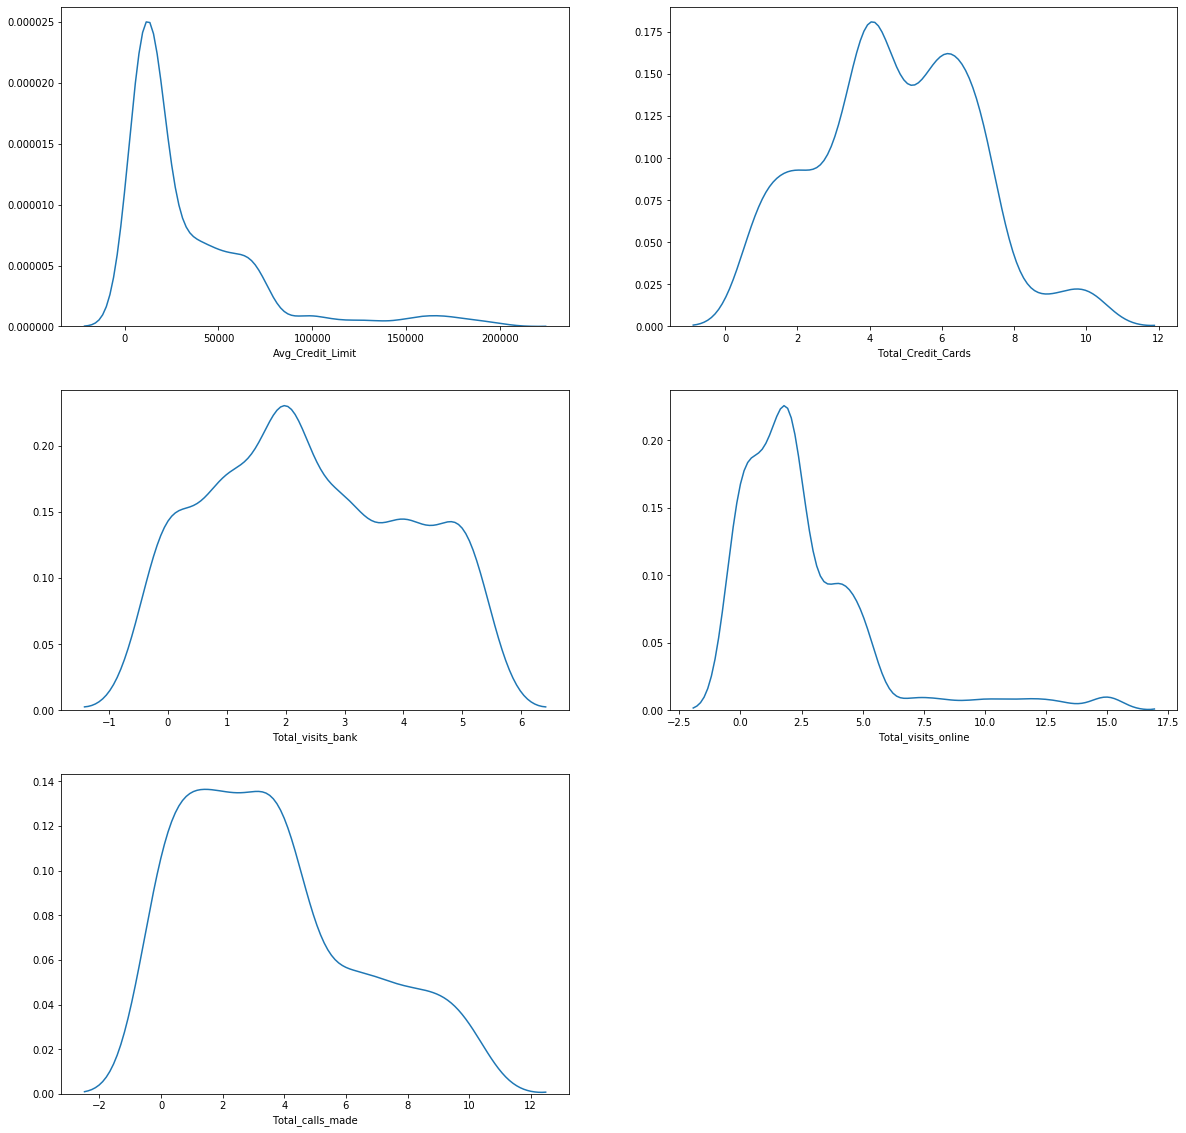

In [51]:

plt.figure(figsize=(20,20))
pos = 1

for i in data.columns:
    plt.subplot(3, 2, pos)
    sns.distplot(data[i],hist=False)
    pos += 1 
    

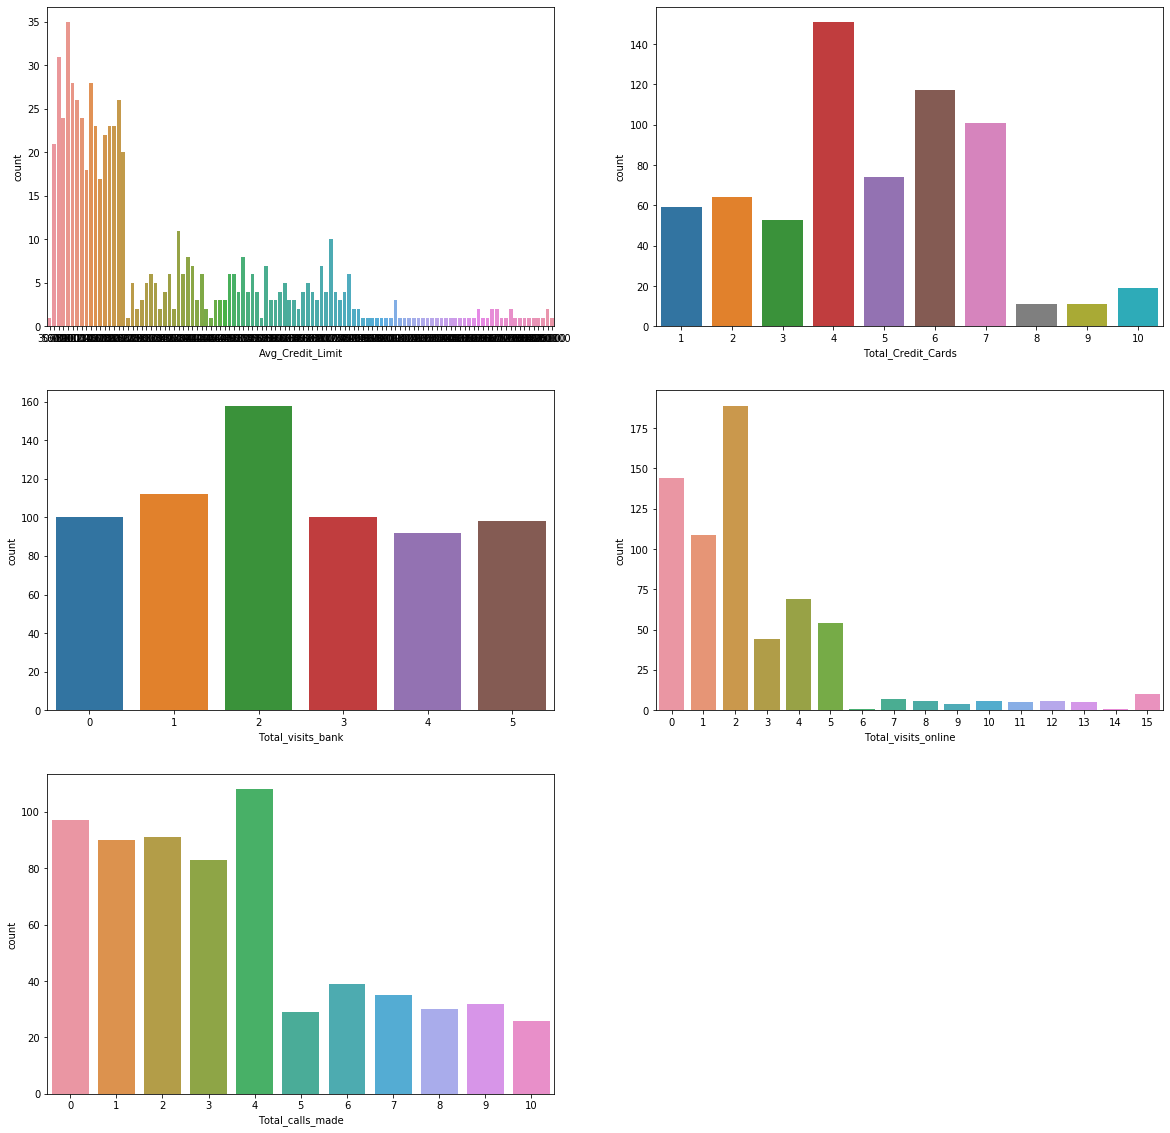

In [52]:

plt.figure(figsize=(20,20))
pos = 1

for i in data.columns:
    plt.subplot(3, 2, pos)
    sns.countplot(data[i])
    pos += 1 
    

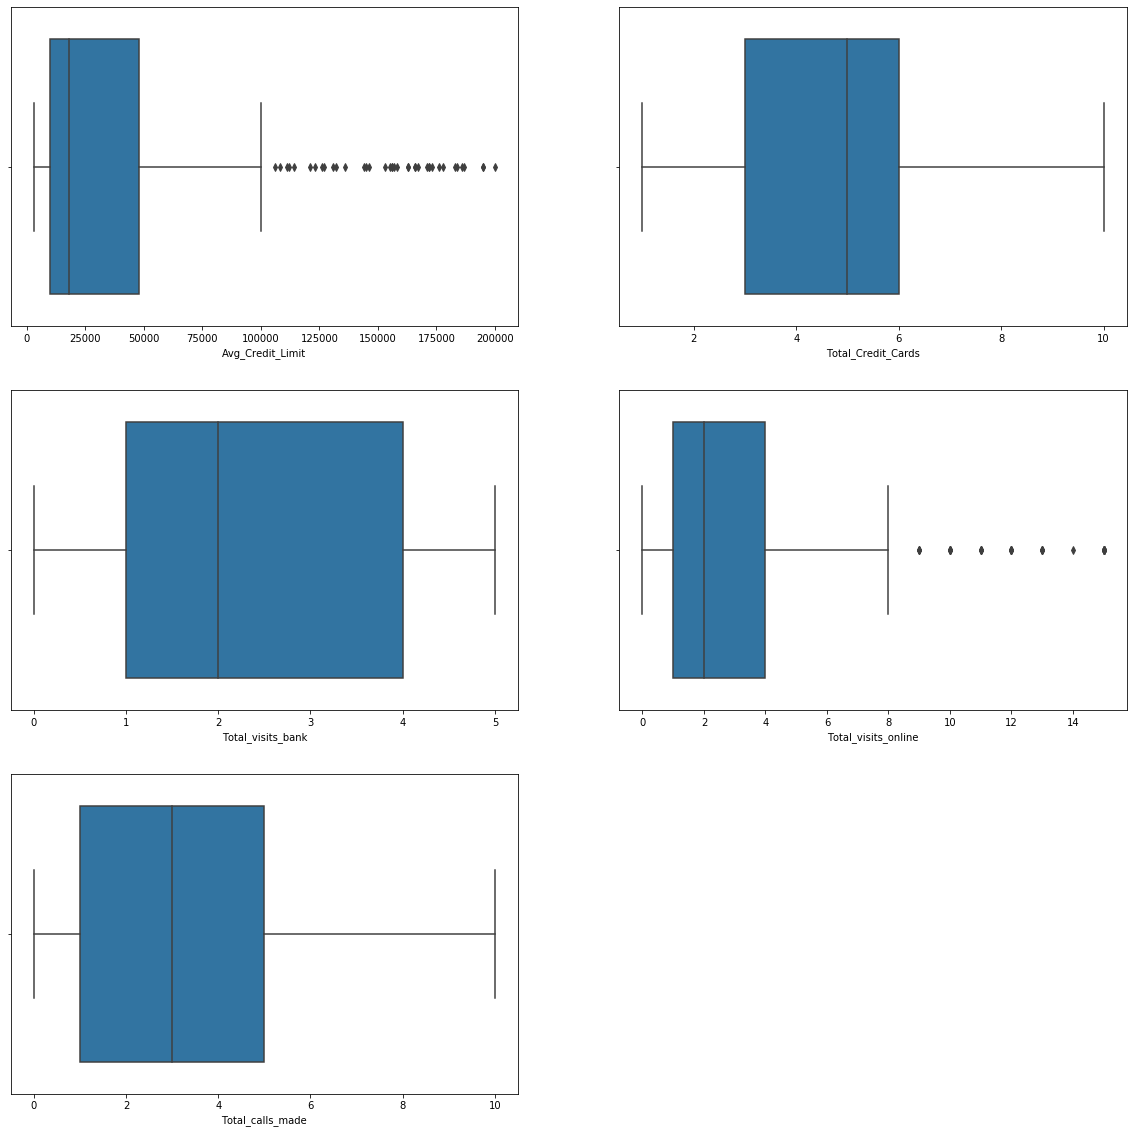

In [53]:
# Boxplot to Check for Outlier

plt.figure(figsize=(20,20))
pos = 1
for i in data.columns:
    plt.subplot(3, 2, pos)
    sns.boxplot(data[i])
    pos += 1 

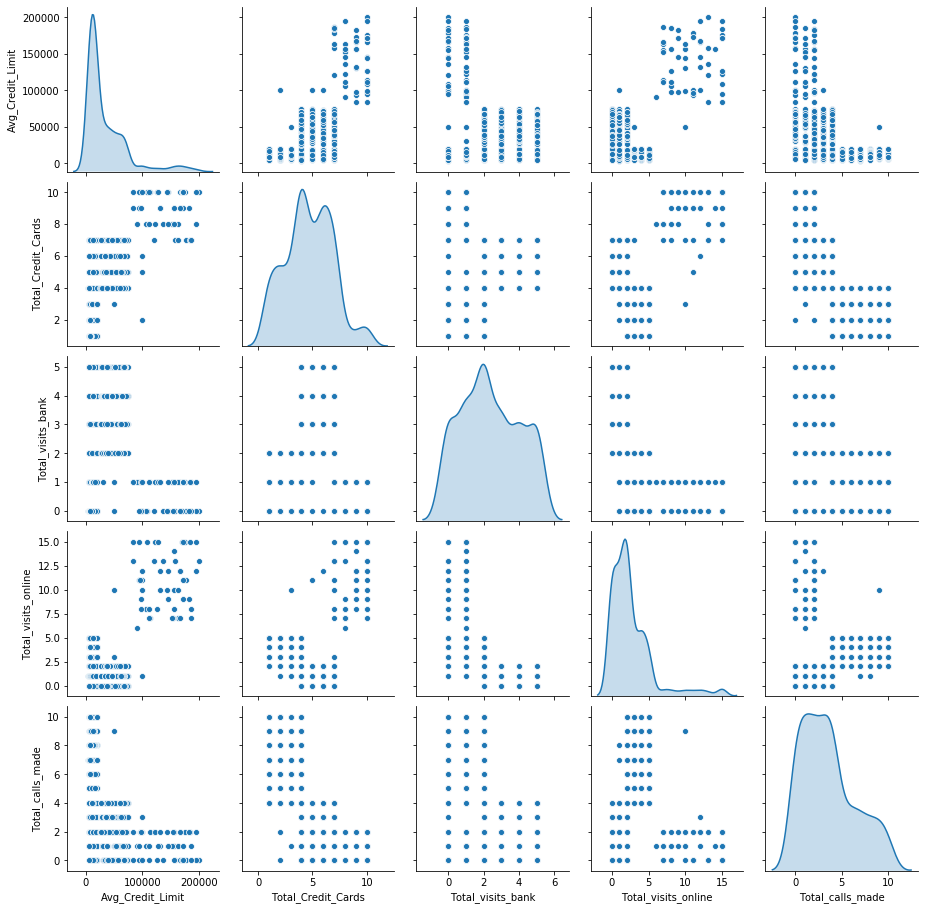

In [54]:
# Pairplot comparison

sns.pairplot(data, diag_kind='kde') 
plt.show()

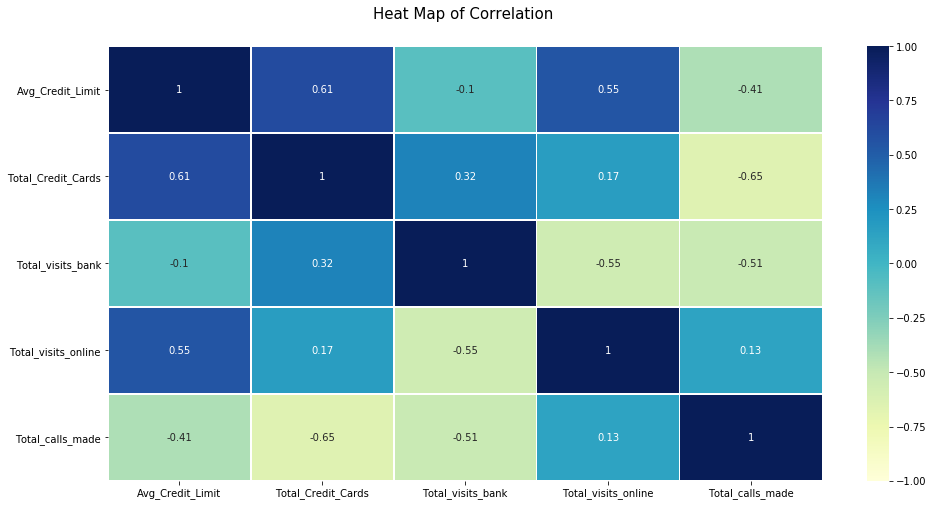

In [55]:
#---------------------------------------Getting Correlation Data----------------------------------------

coor_chd_data = data.corr().round(2);

fig, ax = plt.subplots()
fig.set_size_inches(16, 8)

#--------------------------------------Plotting a heat map of different variables---------------------------------

plt.title('Heat Map of Correlation \n',fontsize=15, pad=10)

sns.heatmap(coor_chd_data,annot=True,cmap='YlGnBu',vmin=-1,vmax=1, linewidths=.5, center=0)


### Based on the above:

    1. There is a tail in the Average credit limit data.
    2. There are outliers in Average credit limit and Total online visits data. 
    3. There is correlation among the attributes.
    4. We may be able to work with 4 or 5 clusters. 

In [56]:
# Outlier treatment

d1 = data.copy()

for i in d1.columns:
    q1, q2, q3 = d1[i].quantile([0.25,0.5,0.75])
    IQR = q3 - q1
    lower_cap=q1-1.5*IQR
    upper_cap=q3+1.5*IQR
    d1[i]=d1[i].apply(lambda x: upper_cap if x>(upper_cap) else (lower_cap if x<(lower_cap) else x))

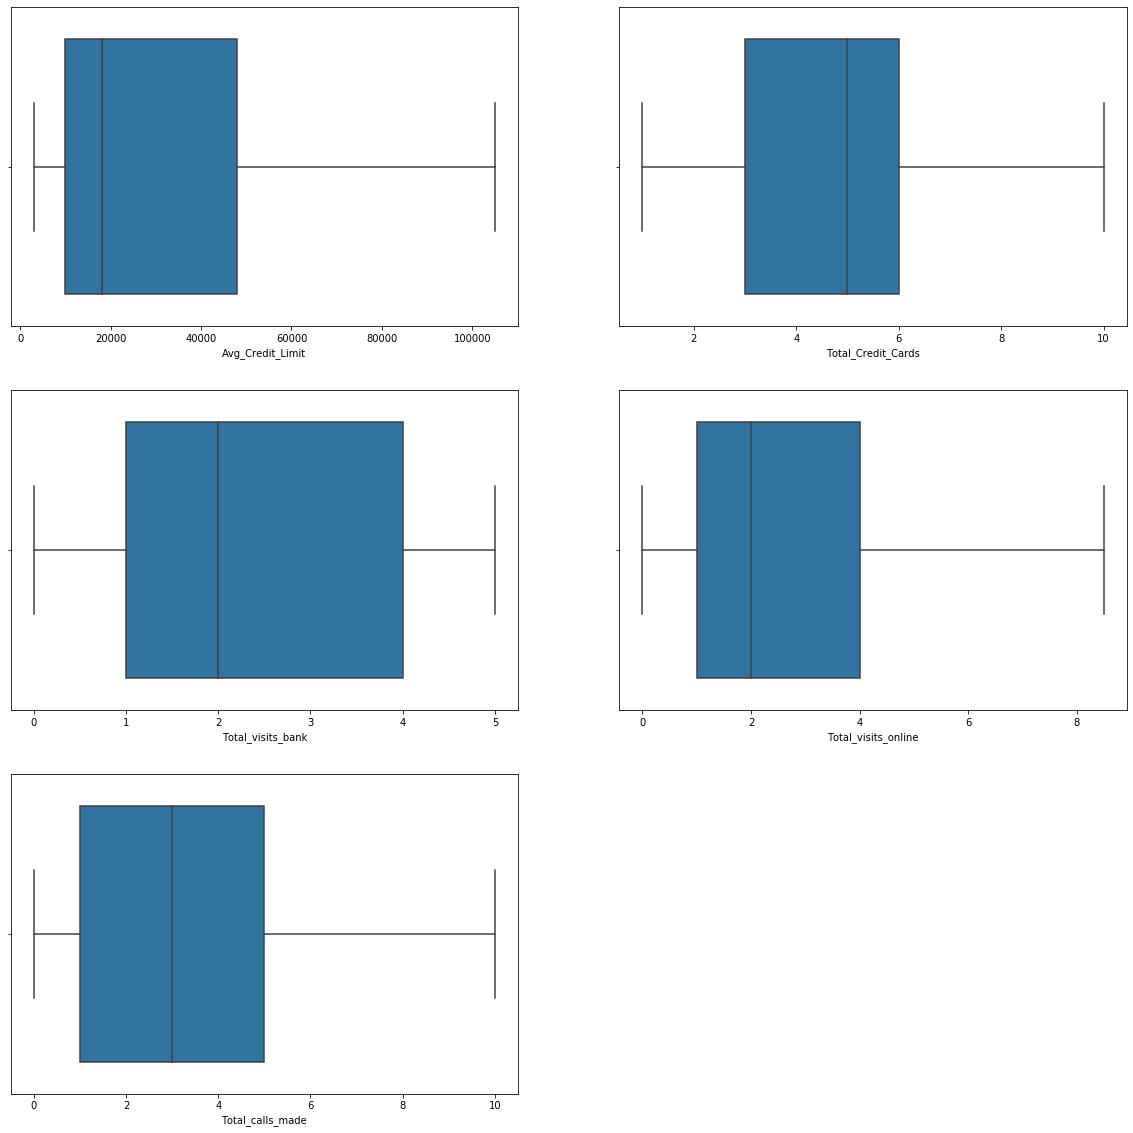

In [57]:
# Boxplot to Check for Outlier

plt.figure(figsize=(20,20))
pos = 1
for i in d1.columns:
    plt.subplot(3, 2, pos)
    sns.boxplot(d1[i])
    pos += 1 

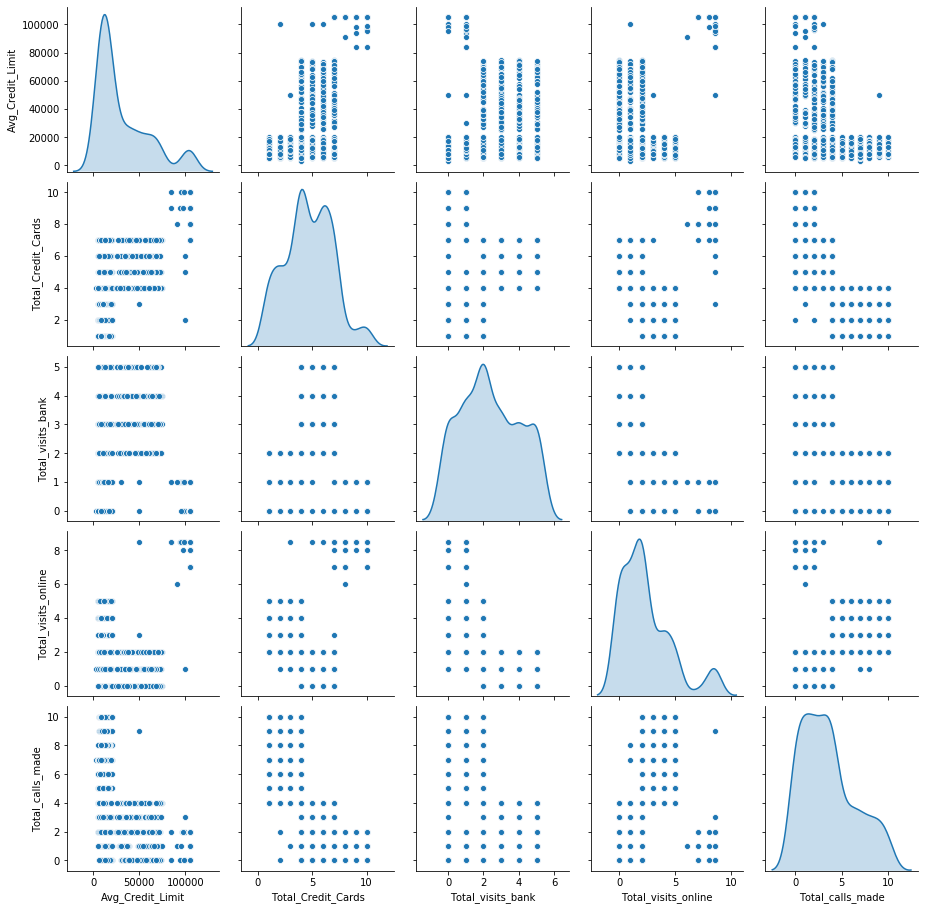

In [58]:
# Pairplot comparison

sns.pairplot(d1, diag_kind='kde') 
plt.show()

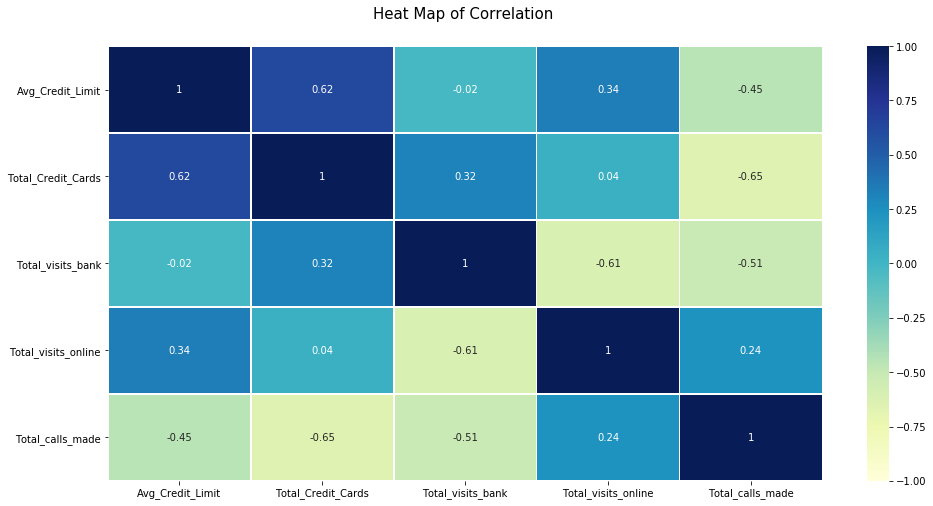

In [59]:
#---------------------------------------Getting Correlation Data----------------------------------------

coor_chd_data = d1.corr().round(2);

fig, ax = plt.subplots()
fig.set_size_inches(16, 8)

#--------------------------------------Plotting a heat map of different variables---------------------------------

plt.title('Heat Map of Correlation \n',fontsize=15, pad=10)

sns.heatmap(coor_chd_data,annot=True,cmap='YlGnBu',vmin=-1,vmax=1, linewidths=.5, center=0);

### After Outlier treatment:

    1. The Average credit limit data is still skewed.
    2. There are no outliers in any columns.
    3. There is correlation among the attributes is still strong.
    4. We may be able to work with 4 or 5 clusters. 
`No columns are dropped for dimensionality reduction.`

In [60]:
# Standardizing the data using z-scores 

from scipy.stats import zscore

d1_z = d1.apply(zscore)


# K-means Clustering

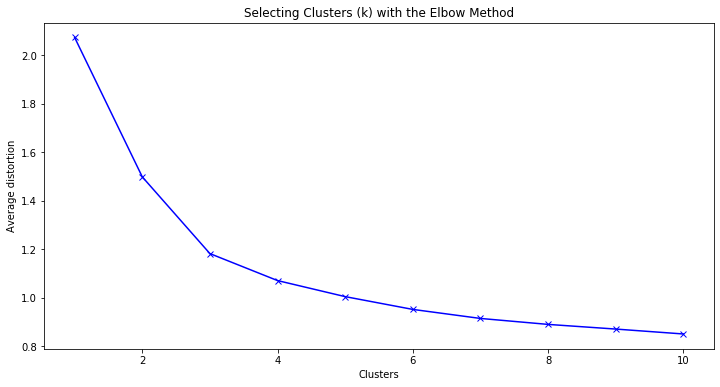

In [61]:
d1_zc = d1_z.copy()

#Finding optimal no. of clusters

from scipy.spatial.distance import cdist

meanDistortions=[]

for k in range(1,11):
    model=KMeans(n_clusters=k, n_jobs = -1, init='k-means++', n_init = 15, random_state=7)
    model.fit(d1_zc)
    meanDistortions.append(sum(np.min(cdist(d1_zc, model.cluster_centers_, 'euclidean'), axis=1)) / d1_zc.shape[0])

plt.figure(figsize = (12,6))
plt.plot(range(1,11), meanDistortions, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('Average distortion')
plt.title('Selecting Clusters (k) with the Elbow Method')
plt.show()

In [62]:
#Finding optimal no. of clusters using inertia

for k in range(1,10):
    kmeans = KMeans(n_clusters = k, n_jobs = -1, init='k-means++', n_init = 15, random_state=7)
    kmeans.fit(d1_zc)
    print(k, kmeans.inertia_)


1 3300.000000000001
2 1949.9046848867488
3 998.4661061743791
4 813.8562952708264
5 715.7762217569278
6 640.3005891071648
7 588.5818239799054
8 560.1247690606989
9 536.904369182636


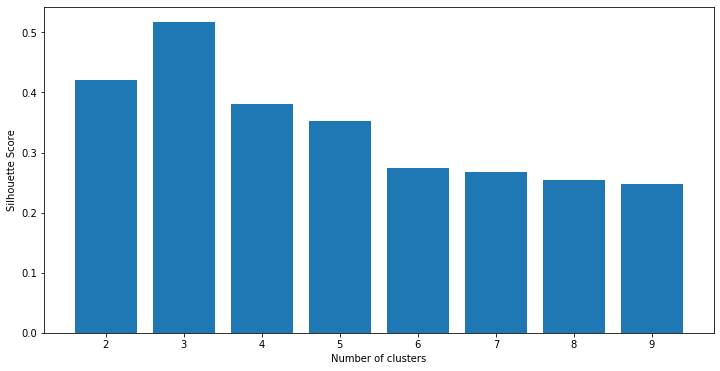

In [63]:
silhouette_scores = [] 

for n_cluster in range(2, 10):
    silhouette_scores.append(silhouette_score(d1_zc, KMeans(n_clusters = n_cluster).fit_predict(d1_zc))) 
    
# Plotting a bar graph to compare the results 
k = range(2, 10) 
plt.figure(figsize = (12,6))
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

## `Setting number of clusters as 3`

In [64]:
d1_zc = d1_z.copy()

kmeans = KMeans(n_clusters = 3, n_jobs = -1, init='k-means++', n_init = 15, random_state=7)
kmeans.fit(d1_zc)
prediction = kmeans.fit_predict(d1_z)


In [65]:
centroids = kmeans.cluster_centers_

#Calculate the centroids for the columns to profile

centroid_df = pd.DataFrame(centroids, columns = list(d1_z) )
centroid_df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,-0.684315,-1.059623,-0.901518,0.509544,1.148109
1,0.074275,0.373690,0.666395,-0.627808,-0.553005
2,2.492325,1.862226,-1.105763,2.563922,-0.874330


In [66]:
#Append the prediction 

d1_zc["GROUP"] = prediction
print("Groups Assigned : \n")
d1_zc

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,2.398942,-1.249225,-0.860451,-0.619767,-1.251537,1
1,0.643619,-0.787585,-1.473731,2.705813,1.891859,0
2,0.643619,1.058973,-0.860451,0.267054,0.145528,1
3,-0.058511,0.135694,-0.860451,-0.619767,0.145528,1
4,2.398942,0.597334,-1.473731,2.705813,-0.203739,2
...,...,...,...,...,...,...
655,2.363835,2.443892,-0.860451,2.705813,-1.251537,2
656,1.837238,2.443892,-0.860451,2.705813,-0.553005,2
657,2.574474,1.520613,-0.860451,2.705813,-0.902271,2
658,2.574474,2.443892,-0.860451,2.705813,-1.251537,2


In [67]:
# pca_std = d1_zc.drop(['Group'])
# pca_std

In [68]:
# Variance explained by each component

pca_std = d1_zc[0:6]

pca=PCA(n_components=6)

principalComponents = pca.fit_transform(d1_zc)

variance=pca.explained_variance_ratio_

print("Variance explained by each component")

j=1
for i in variance:
    print("PC",j,":",(i*100))
    j+=1


Variance explained by each component
PC 1 : 49.419185790255185
PC 2 : 32.7099703910396
PC 3 : 6.102701278352604
PC 4 : 5.815767195553714
PC 5 : 5.197559258236976
PC 6 : 0.754816086561908


In [69]:
# Visualize the clusters

pca=PCA(n_components=2)

principalComponents = pca.fit_transform(d1_zc)

dk3_pca = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

dk3_pca['cluster']=kmeans.labels_
dk3_pca.head()


,pc1,pc2,cluster
0,-0.848263,0.819647,1
1,2.250220,2.886083,0
2,-0.508466,1.153937,1
3,0.177692,0.069104,1
4,-1.020218,3.922229,2


In [70]:
dk3_pca['cluster'].value_counts()  

1    386
0    224
2     50
Name: cluster, dtype: int64

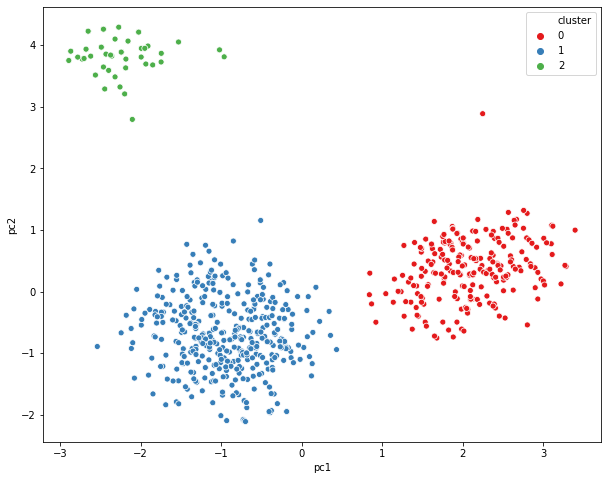

In [71]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=dk3_pca.pc1, y=dk3_pca.pc2, hue=dk3_pca.cluster, palette="Set1")
plt.show()

In [72]:
## creating a new dataframe only for labels and converting it into categorical variable

df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['Group']))

df_labels['Group'] = df_labels['Group'].astype('category')

# Joining the label dataframe with the data frame.

dfk3 = d1.join(df_labels)

# dfk3.groupby(['Group']).describe().round().T

## `Setting number of clusters as 4`

In [73]:
d1_zc = d1_z.copy()

kmeans = KMeans(n_clusters = 4, n_jobs = -1, init='k-means++', n_init = 15, random_state=7)
kmeans.fit(d1_zc)
prediction = kmeans.fit_predict(d1_z)


In [74]:
centroids = kmeans.cluster_centers_

#Calculate the centroids for the columns to profile

centroid_df = pd.DataFrame(centroids, columns = list(d1_zc) )
centroid_df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,-0.504505,0.365479,0.800631,-0.611814,-0.573366
1,-0.683500,-1.062913,-0.904453,0.512620,1.152605
2,0.855542,0.380588,0.478295,-0.646805,-0.521060
3,2.492325,1.862226,-1.105763,2.563922,-0.874330


In [75]:
#Append the prediction 

d1_zc["GROUP"] = prediction
print("Groups Assigned : \n")
d1_zc

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,2.398942,-1.249225,-0.860451,-0.619767,-1.251537,2
1,0.643619,-0.787585,-1.473731,2.705813,1.891859,1
2,0.643619,1.058973,-0.860451,0.267054,0.145528,2
3,-0.058511,0.135694,-0.860451,-0.619767,0.145528,2
4,2.398942,0.597334,-1.473731,2.705813,-0.203739,3
...,...,...,...,...,...,...
655,2.363835,2.443892,-0.860451,2.705813,-1.251537,3
656,1.837238,2.443892,-0.860451,2.705813,-0.553005,3
657,2.574474,1.520613,-0.860451,2.705813,-0.902271,3
658,2.574474,2.443892,-0.860451,2.705813,-1.251537,3


In [76]:
# Visualize the clusters

pca=PCA(n_components=2)

principalComponents = pca.fit_transform(d1_zc)

dk4_pca = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

dk4_pca['cluster'] = kmeans.labels_
dk4_pca.head()


,pc1,pc2,cluster
0,1.477406,0.662816,2
1,-0.664347,3.315379,1
2,1.184866,0.980540,2
3,0.160281,0.535044,2
4,2.799894,3.313339,3


In [77]:
dk4_pca['cluster'].value_counts()  

1    223
0    223
2    164
3     50
Name: cluster, dtype: int64

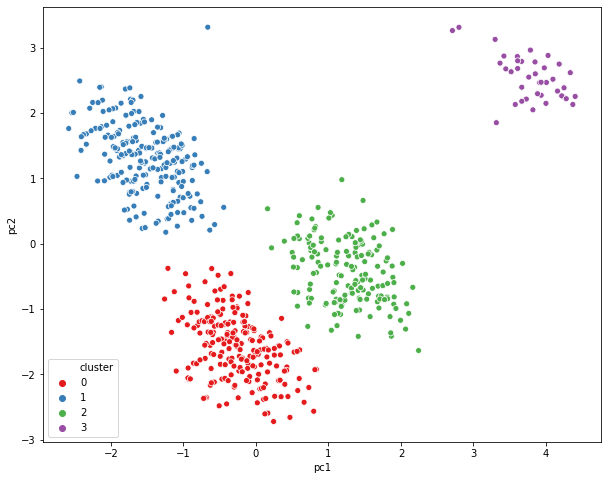

In [78]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=dk4_pca.pc1, y=dk4_pca.pc2, hue=dk4_pca.cluster, palette="Set1")
plt.show()

In [79]:
## creating a new dataframe only for labels and converting it into categorical variable

df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['Group']))

df_labels['Group'] = df_labels['Group'].astype('category')

# Joining the label dataframe with the data frame.

dfk4 = data_copy.join(df_labels)

# dfk4.groupby(['Group']).describe().round().T

## `Setting number of clusters as 5`

In [80]:
d1_zc = d1_z.copy()

kmeans = KMeans(n_clusters = 5, n_jobs = -1, init='k-means++', n_init = 15, random_state=7)
kmeans.fit(d1_zc)
prediction = kmeans.fit_predict(d1_z)


In [81]:
centroids = kmeans.cluster_centers_

#Calculate the centroids for the columns to profile

centroid_df = pd.DataFrame(centroids, columns = list(d1_zc) )
centroid_df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,-0.353790,0.353866,1.323835,-0.589397,-0.557789
1,-0.684550,-1.067493,-0.904851,0.518855,1.166460
2,1.020595,0.366514,0.453721,-0.679593,-0.553005
3,2.492325,1.862226,-1.105763,2.563922,-0.874330
4,-0.429679,0.384269,0.041124,-0.608398,-0.538079


In [82]:
#Append the prediction 

d1_zc["GROUP"] = prediction
print("Groups Assigned : \n")
d1_zc

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,2.398942,-1.249225,-0.860451,-0.619767,-1.251537,2
1,0.643619,-0.787585,-1.473731,2.705813,1.891859,1
2,0.643619,1.058973,-0.860451,0.267054,0.145528,4
3,-0.058511,0.135694,-0.860451,-0.619767,0.145528,4
4,2.398942,0.597334,-1.473731,2.705813,-0.203739,3
...,...,...,...,...,...,...
655,2.363835,2.443892,-0.860451,2.705813,-1.251537,3
656,1.837238,2.443892,-0.860451,2.705813,-0.553005,3
657,2.574474,1.520613,-0.860451,2.705813,-0.902271,3
658,2.574474,2.443892,-0.860451,2.705813,-1.251537,3


In [83]:
# Visualize the clusters

pca=PCA(n_components=2)

principalComponents = pca.fit_transform(d1_zc)

dk5_pca = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

dk5_pca['cluster']= kmeans.labels_
dk5_pca.head()


,pc1,pc2,cluster
0,1.102842,0.330756,2
1,-1.369385,2.930928,1
2,2.123040,1.534722,4
3,1.349323,1.198930,4
4,2.210345,2.852942,3


In [84]:
dk5_pca['cluster'].value_counts()  

1    221
0    146
2    126
4    117
3     50
Name: cluster, dtype: int64

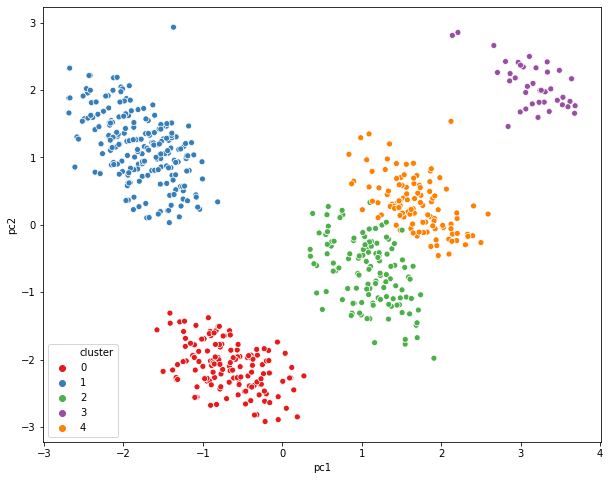

In [85]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=dk5_pca.pc1, y=dk5_pca.pc2, hue=dk5_pca.cluster, palette="Set1")
plt.show()

In [86]:
## creating a new dataframe only for labels and converting it into categorical variable

df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['Group']))

df_labels['Group'] = df_labels['Group'].astype('category')

# Joining the label dataframe with the data frame.

dfk5 = d1.join(df_labels)

# dfk5.groupby(['Group']).describe().round().T

## `Preferred number of clusters would be 4.`

# Hierarchial Clustering

In [87]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

from scipy.spatial.distance import pdist  #Pairwise distribution between data points

from sklearn.cluster import AgglomerativeClustering 


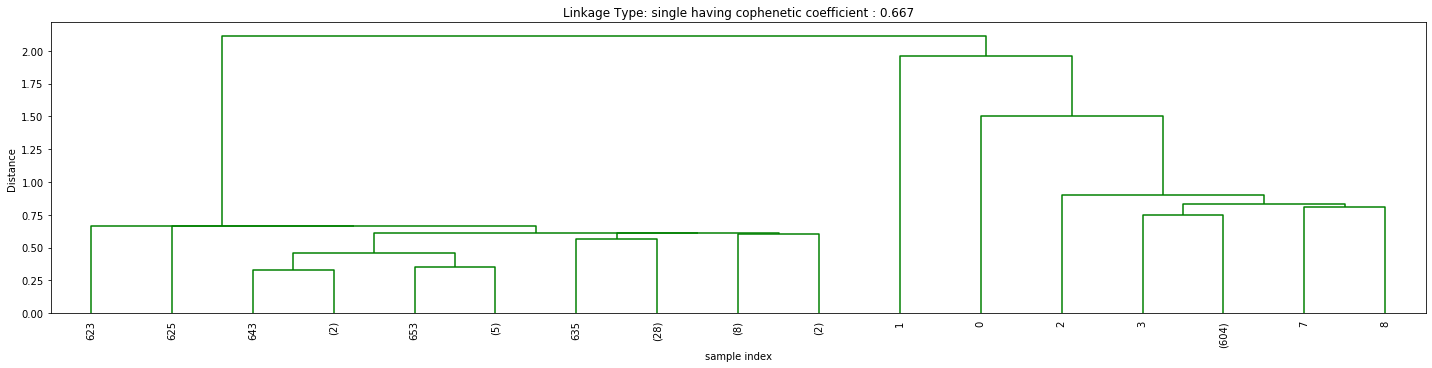

single 0.6666982080229052


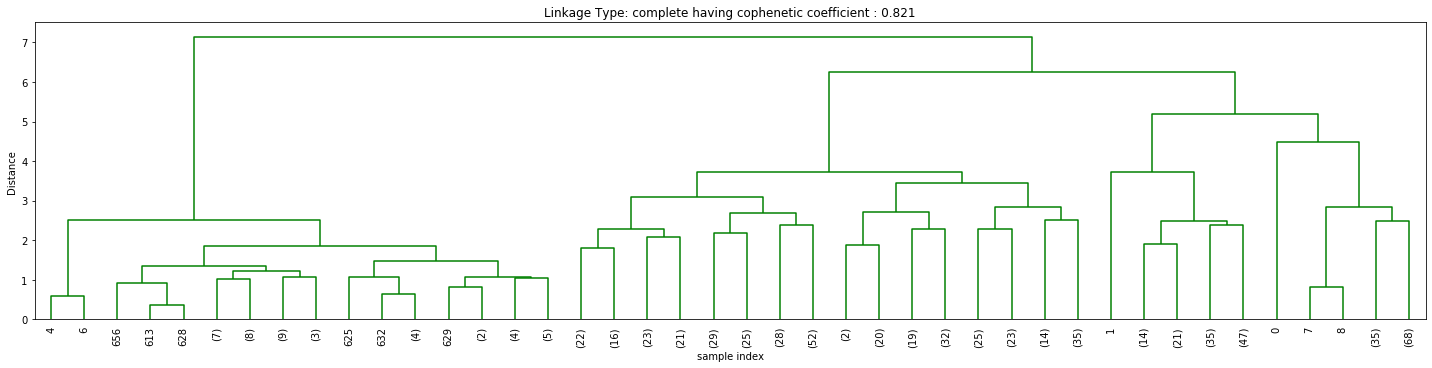

complete 0.8207884321476555


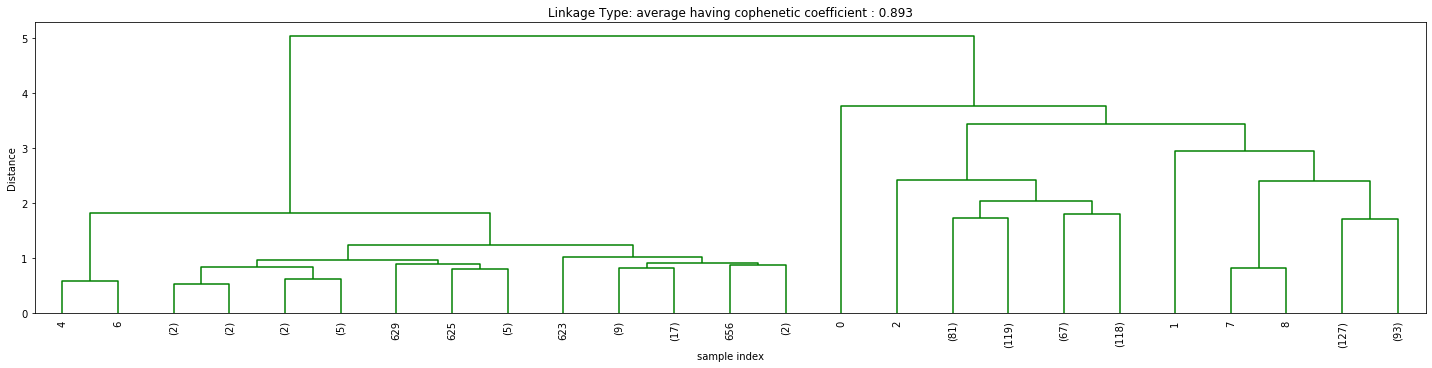

average 0.8926672966587861


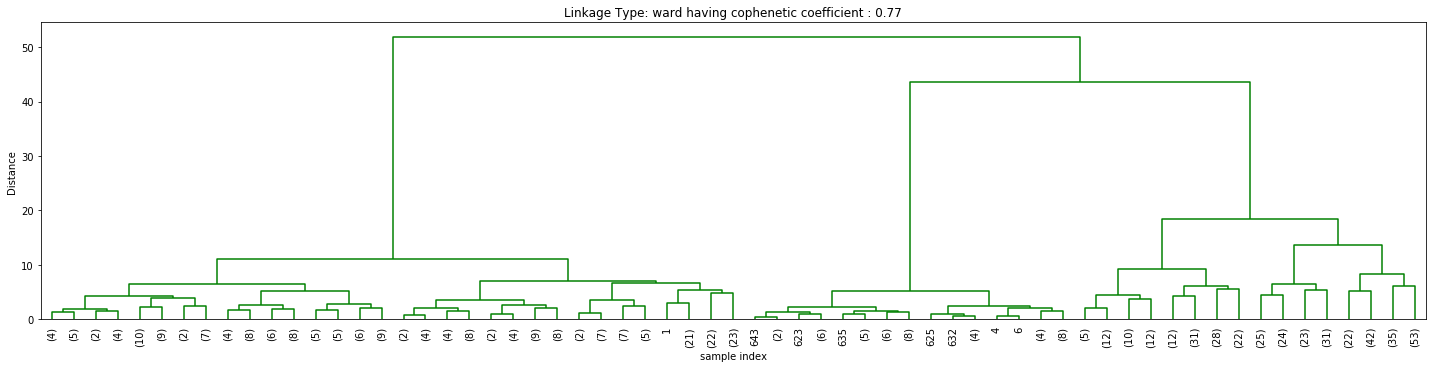

ward 0.7702265240776373


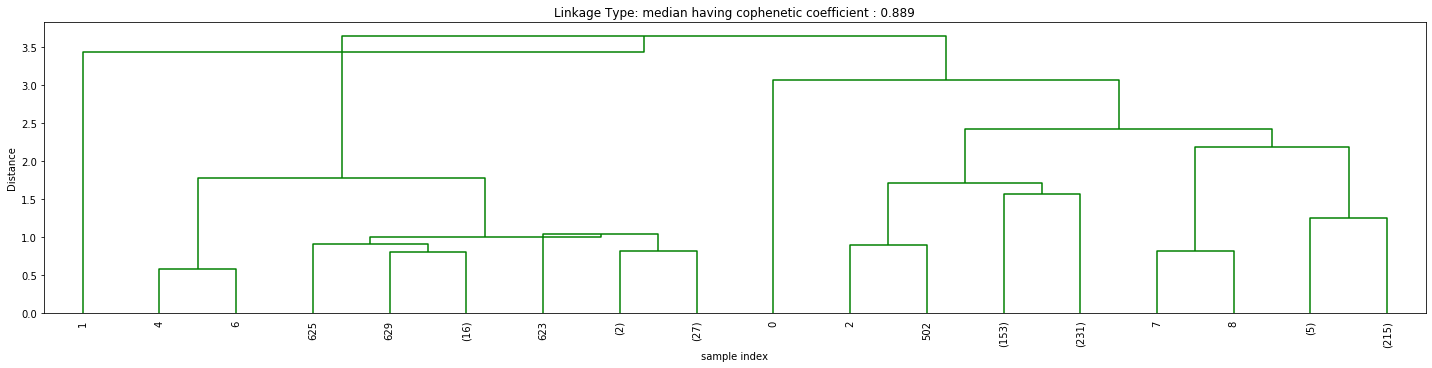

median 0.8887160179419454


In [88]:

d1_zc = d1_z.copy()

linkage_methods=['single','complete','average','ward','median']

results_cophenetic_coef=[]

for i in linkage_methods:
    
    plt.figure(figsize=(20, 5))
    
    plt.xlabel('sample index')
    plt.ylabel('Distance')
    
    Z = linkage(d1_zc, i)
    
    cc,cophn_dist=cophenet(Z,pdist(d1_zc))
    
    dendrogram(Z, leaf_rotation = 90.0, p = 5, leaf_font_size = 10, truncate_mode = 'level', color_threshold = 60)
        
    plt.tight_layout()
    
    plt.title("Linkage Type: "+ i +" having cophenetic coefficient : "+str(round(cc,3)) )
    
    plt.show()
    results_cophenetic_coef.append((i,cc))
    print (i,cc)

In [89]:
# Creating the table for the Copheetics coefficients

results_cophenetic_coef_df = pd.DataFrame(results_cophenetic_coef,columns=['LinkageMethod','CopheneticCoefficient'])

results_cophenetic_coef_df

,LinkageMethod,CopheneticCoefficient
0,single,0.666698
1,complete,0.820788
2,average,0.892667
3,ward,0.770227
4,median,0.888716


In [90]:
# Calculate Avg Silhoutte Score

d2 = d1.copy()

for i in range(2,10):
    model = AgglomerativeClustering(n_clusters=i, affinity='euclidean',  linkage='average')
    model.fit(d1_zc)
    d2['Group'] = model.labels_
    print("K=",i,"-",silhouette_score(d1_zc, d2['Group']))


K= 2 - 0.5172480049319457
K= 3 - 0.3442527725855535
K= 4 - 0.4808223272655649
K= 5 - 0.4448661673623261
K= 6 - 0.3184583024863396
K= 7 - 0.2679214686687222
K= 8 - 0.25246208657976804
K= 9 - 0.23295377560327554


### `Number of clusters used is 4 and the linkage used is 'average' for the maximum cophenetic coefficient.`

In [111]:
# Visualize the clusters

model = AgglomerativeClustering(n_clusters = 4, affinity='euclidean',  linkage='average')
model.fit(d1_zc)

pca=PCA(n_components=2)

principalComponents = pca.fit_transform(d1_zc)

dH_pca = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

dH_pca['cluster']=model.labels_
dH_pca.head()


,pc1,pc2,cluster
0,-0.734723,0.899287,2
1,2.380586,2.694705,0
2,-0.339927,1.185279,1
3,0.282966,0.009492,1
4,-0.285443,3.885192,3


In [112]:
dH_pca['cluster'].value_counts()  

1    386
0    223
3     50
2      1
Name: cluster, dtype: int64

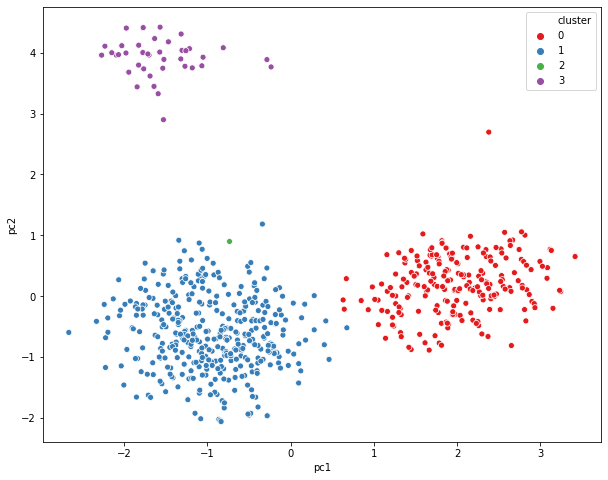

In [93]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=dH_pca.pc1, y=dH_pca.pc2, hue=dH_pca.cluster, palette="Set1")
plt.show()

In [94]:
d2 = d1.copy()

## creating a new dataframe only for labels and converting it into categorical variable

df_labels = pd.DataFrame(model.labels_ , columns = list(['Group']))

df_labels['Group'] = df_labels['Group'].astype('category')

# Joining the label dataframe with the data frame.

dfH4 = data_copy.join(df_labels)

# dfH4.groupby(['Group']).describe().round().T

### Comparison between K-Means & Hierarchial Clustering

In [95]:
dfk4.drop(['Sl_No', 'Customer Key'], axis=1, inplace=True)

dfk4.rename(columns = {'Avg_Credit_Limit' : 'K-Avg_Credit_Limit', 'Total_Credit_Cards' : 'K-Total_Credit_Cards','Total_visits_bank' : 'K-Total_visits_bank',
                       'Total_visits_online' : 'K-Total_visits_online', 'Total_calls_made' : 'K-Total_calls_made', 'Group' : 'K-Group'}, inplace = True)

dfH4.drop(['Sl_No', 'Customer Key'], axis=1, inplace=True)

dfH4.rename(columns = {'Avg_Credit_Limit' : 'H-Avg_Credit_Limit', 'Total_Credit_Cards' : 'H-Total_Credit_Cards','Total_visits_bank' : 'H-Total_visits_bank',
                       'Total_visits_online' : 'H-Total_visits_online', 'Total_calls_made' : 'H-Total_calls_made', 'Group' : 'H-Group'}, inplace = True)


In [96]:
display(dfk4.groupby(['K-Group']).agg({'K-Avg_Credit_Limit': ['count', 'mean', 'std', 'min', 'max']}).T.round(), dfH4.groupby(['H-Group']).agg({'H-Avg_Credit_Limit': ['count', 'mean', 'std', 'min', 'max']}).round().T)

display(dfk4.groupby(['K-Group']).agg({'K-Total_Credit_Cards': ['mean', 'std', 'min', 'max']}).T.round(), dfH4.groupby(['H-Group']).agg({'H-Total_Credit_Cards': ['mean', 'std', 'min', 'max']}).round().T)

display(dfk4.groupby(['K-Group']).agg({'K-Total_visits_bank': ['mean', 'std', 'min', 'max']}).T.round(), dfH4.groupby(['H-Group']).agg({'H-Total_visits_bank': ['mean', 'std', 'min', 'max']}).round().T)

display(dfk4.groupby(['K-Group']).agg({'K-Total_visits_online': ['mean', 'std', 'min', 'max']}).T.round(), dfH4.groupby(['H-Group']).agg({'H-Total_visits_online': ['mean', 'std', 'min', 'max']}).round().T)

display(dfk4.groupby(['K-Group']).agg({'K-Total_calls_made': ['mean', 'std', 'min', 'max']}).T.round(), dfH4.groupby(['H-Group']).agg({'H-Total_calls_made': ['mean', 'std', 'min', 'max']}).round().T)



K-Group                         0        1         2         3
K-Avg_Credit_Limit count    223.0    223.0     164.0      50.0
                   mean   17296.0  12197.0   56037.0  141040.0
                   std     9997.0   5249.0   12610.0   34458.0
                   min     5000.0   3000.0   30000.0   84000.0
                   max    41000.0  50000.0  100000.0  200000.0

H-Group                         0        1         2         3
H-Avg_Credit_Limit count    223.0    386.0       1.0      50.0
                   mean   12197.0  33541.0  100000.0  141040.0
                   std     5249.0  21952.0       NaN   34458.0
                   min     3000.0   5000.0  100000.0   84000.0
                   max    50000.0  75000.0  100000.0  200000.0

K-Group                      0    1    2     3
K-Total_Credit_Cards mean  5.0  2.0  6.0   9.0
                     std   1.0  1.0  1.0   1.0
                     min   4.0  1.0  2.0   5.0
                     max   7.0  4.0  7.0  10.0

H-Group                      0    1    2     3
H-Total_Credit_Cards mean  2.0  6.0  2.0   9.0
                     std   1.0  1.0  NaN   1.0
                     min   1.0  4.0  2.0   5.0
                     max   4.0  7.0  2.0  10.0

K-Group                     0    1    2    3
K-Total_visits_bank mean  4.0  1.0  3.0  1.0
                    std   1.0  1.0  1.0  0.0
                    min   2.0  0.0  1.0  0.0
                    max   5.0  2.0  5.0  1.0

H-Group                     0    1    2    3
H-Total_visits_bank mean  1.0  3.0  1.0  1.0
                    std   1.0  1.0  NaN  0.0
                    min   0.0  1.0  1.0  0.0
                    max   2.0  5.0  1.0  1.0

K-Group                       0     1    2     3
K-Total_visits_online mean  1.0   4.0  1.0  11.0
                      std   1.0   1.0  1.0   3.0
                      min   0.0   1.0  0.0   6.0
                      max   2.0  10.0  3.0  15.0

H-Group                        0    1    2     3
H-Total_visits_online mean   4.0  1.0  1.0  11.0
                      std    1.0  1.0  NaN   3.0
                      min    1.0  0.0  1.0   6.0
                      max   10.0  3.0  1.0  15.0

K-Group                    0     1    2    3
K-Total_calls_made mean  2.0   7.0  2.0  1.0
                   std   1.0   2.0  1.0  1.0
                   min   0.0   1.0  0.0  0.0
                   max   4.0  10.0  4.0  3.0

H-Group                     0    1    2    3
H-Total_calls_made mean   7.0  2.0  0.0  1.0
                   std    2.0  1.0  NaN  1.0
                   min    1.0  0.0  0.0  0.0
                   max   10.0  4.0  0.0  3.0

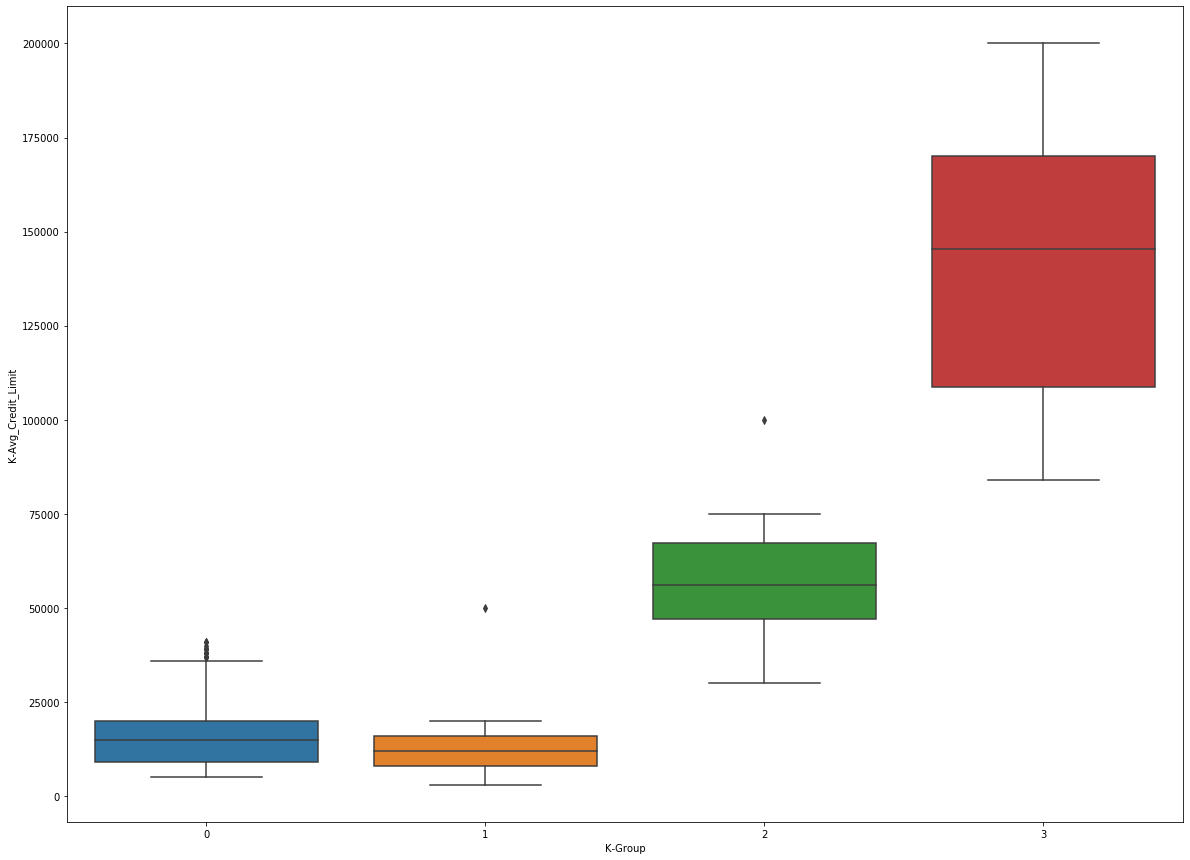

In [97]:
plt.figure(figsize=(20,15))
sns.boxplot(x = dfk4['K-Group'], y = dfk4['K-Avg_Credit_Limit'])
plt.show()

K-means Clustering        
Mean credit limit in descending order is as 3 > 2 > 0 > 1. 
It is advisable to approach the cluster group 0, 1 & 3 for new credit cards since they are having the low credit limits. 

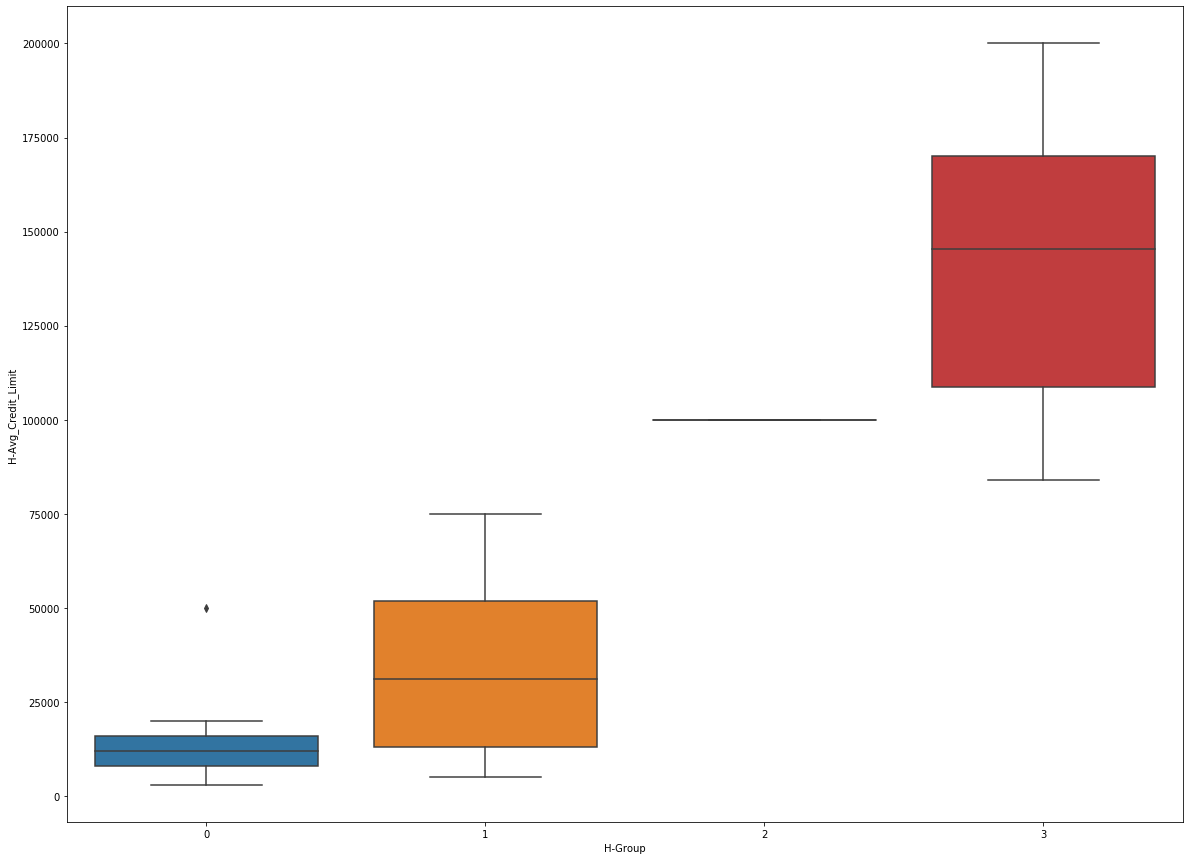

In [98]:
plt.figure(figsize=(20,15))
sns.boxplot(x = dfH4['H-Group'], y = dfH4['H-Avg_Credit_Limit'])
plt.show()

Heirarchial Clustering        
Mean credit limit in descending order is as 3 > 2 > 1 > 0. 
It is advisable to approach the cluster group 0, 1 & 2 for new credit cards since they are having the low credit limits. 

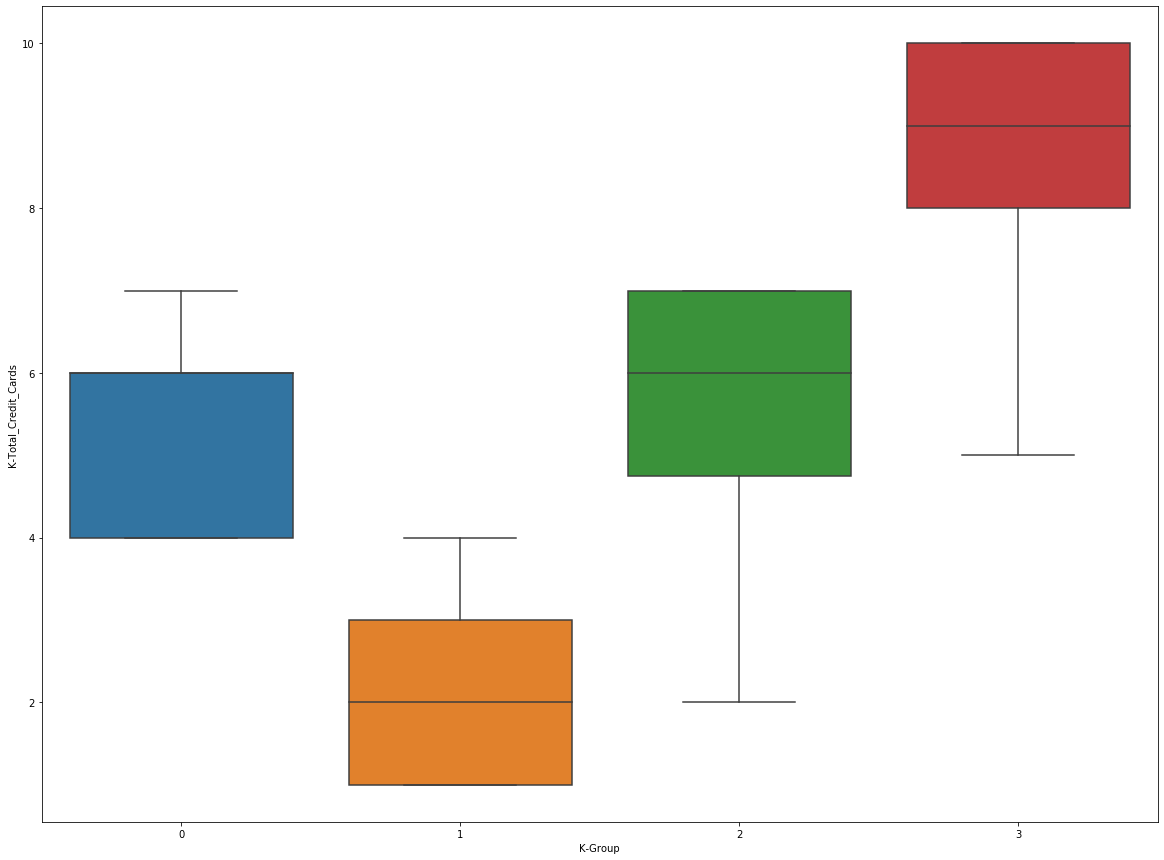

In [99]:
plt.figure(figsize=(20,15))
sns.boxplot(x = dfk4['K-Group'], y = dfk4['K-Total_Credit_Cards'])
plt.show()

K-means Clustering        
Mean total credit cards in descending order is as 3 > 2 > 0 > 1. 
It is advisable to approach the cluster group 1 for new credit cards since they are having the low total credit cards. 

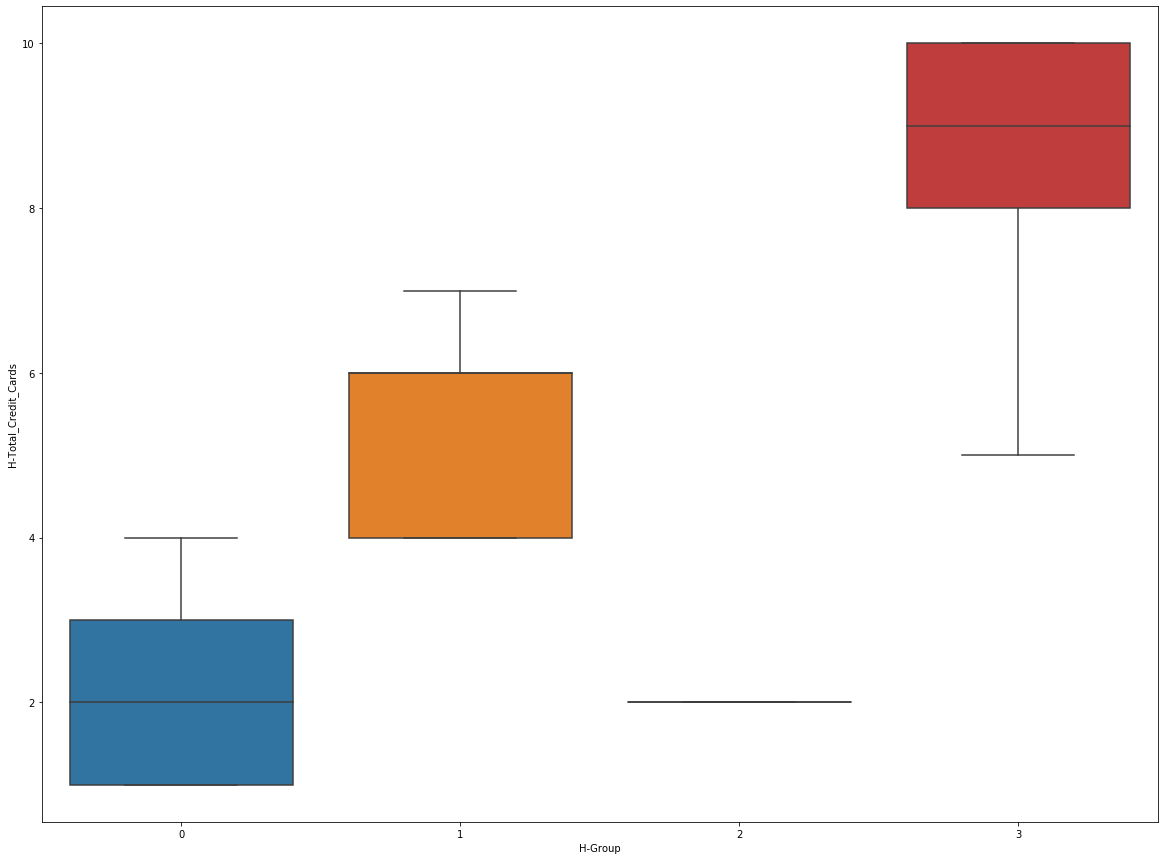

In [100]:
plt.figure(figsize=(20,15))
sns.boxplot(x = dfH4['H-Group'], y = dfH4['H-Total_Credit_Cards'])
plt.show()

Heirarchial Clustering        
Mean total credit cards in descending order is as 3 > 1 > 0,2. 
It is advisable to approach the cluster group 0, 2 for new credit cards since they are having the low total credit cards. 

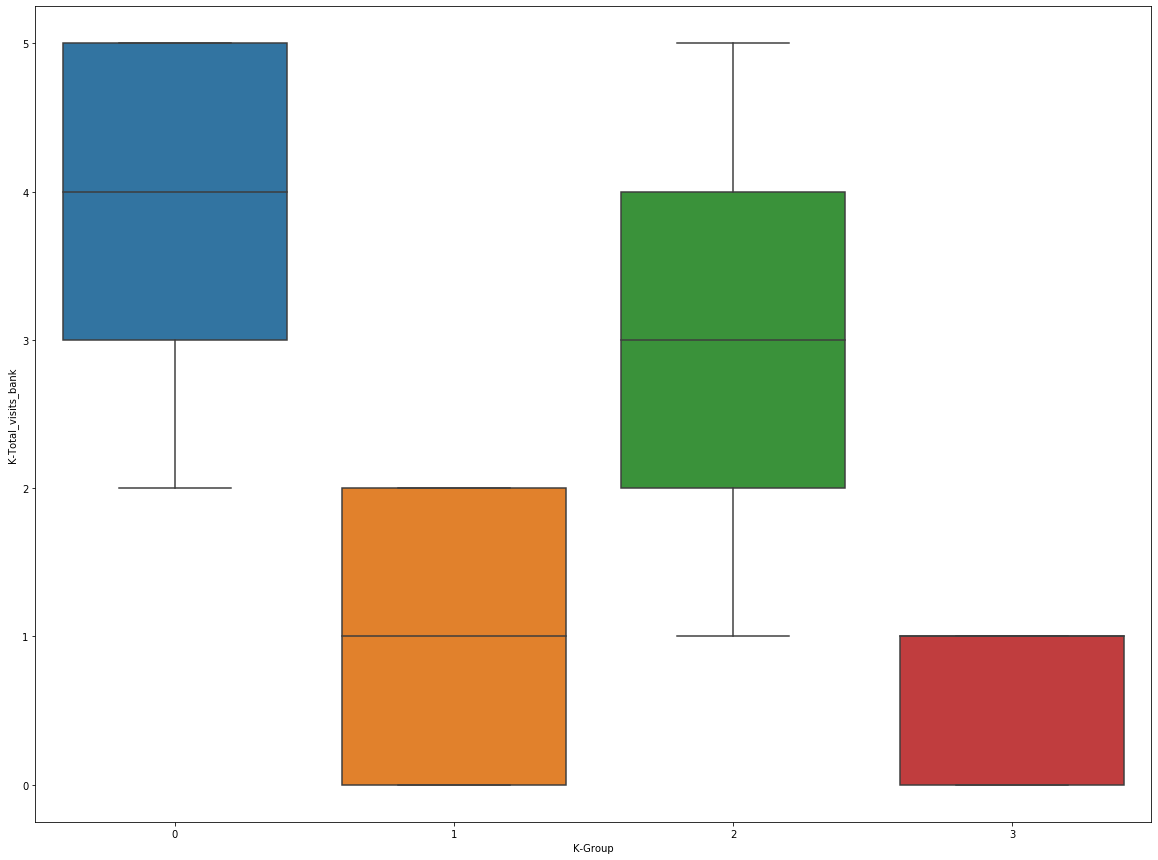

In [101]:
plt.figure(figsize=(20,15))
sns.boxplot(x = dfk4['K-Group'], y = dfk4['K-Total_visits_bank'])
plt.show()

K-means Clustering        
Mean total bank visits in descending order is as 0 > 2 > 1 > 3. 
It is advisable to approach the cluster group 0 & 2 regarding their issues to improve servicability. 

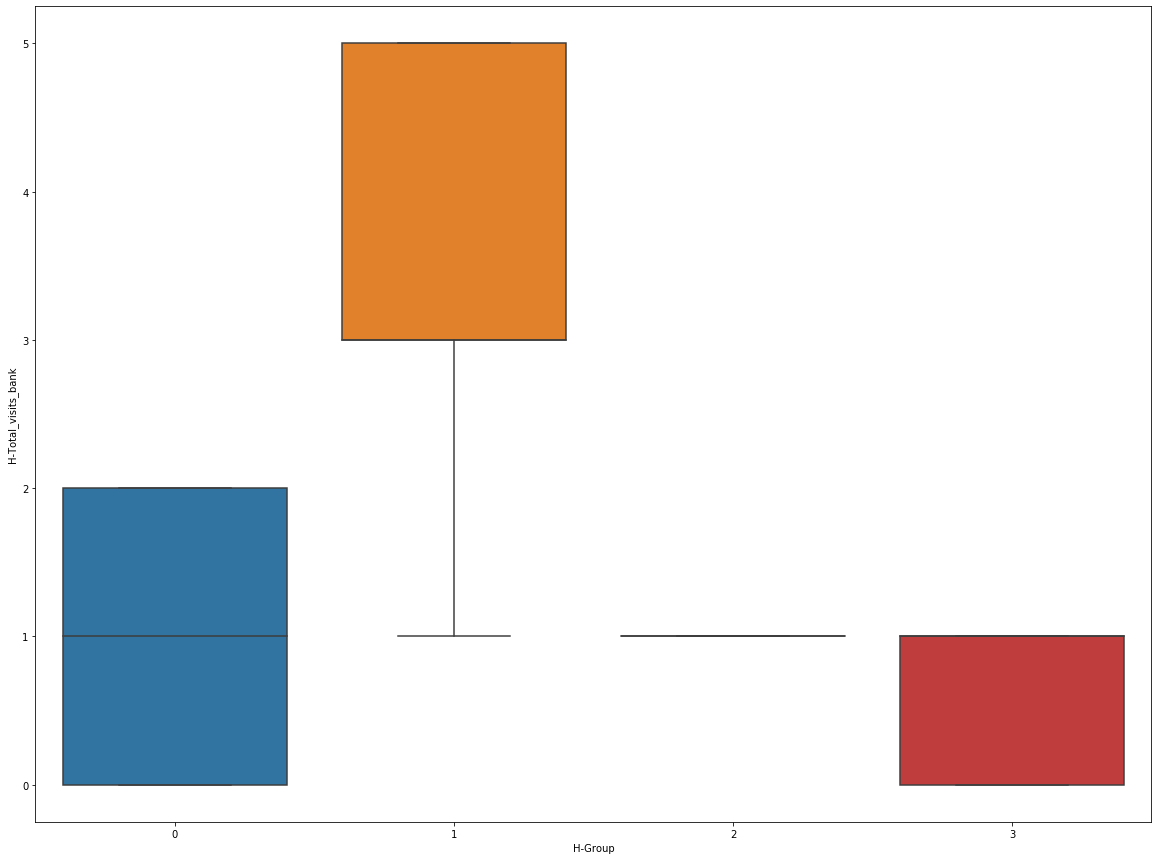

In [102]:
plt.figure(figsize=(20,15))
sns.boxplot(x = dfH4['H-Group'], y = dfH4['H-Total_visits_bank'])
plt.show()

Heirarchial Clustering        
Mean total bank visits in descending order is as 2 > 0, 1, 3. 
It is advisable to approach the cluster group 1 regarding their issues to improve servicability. 

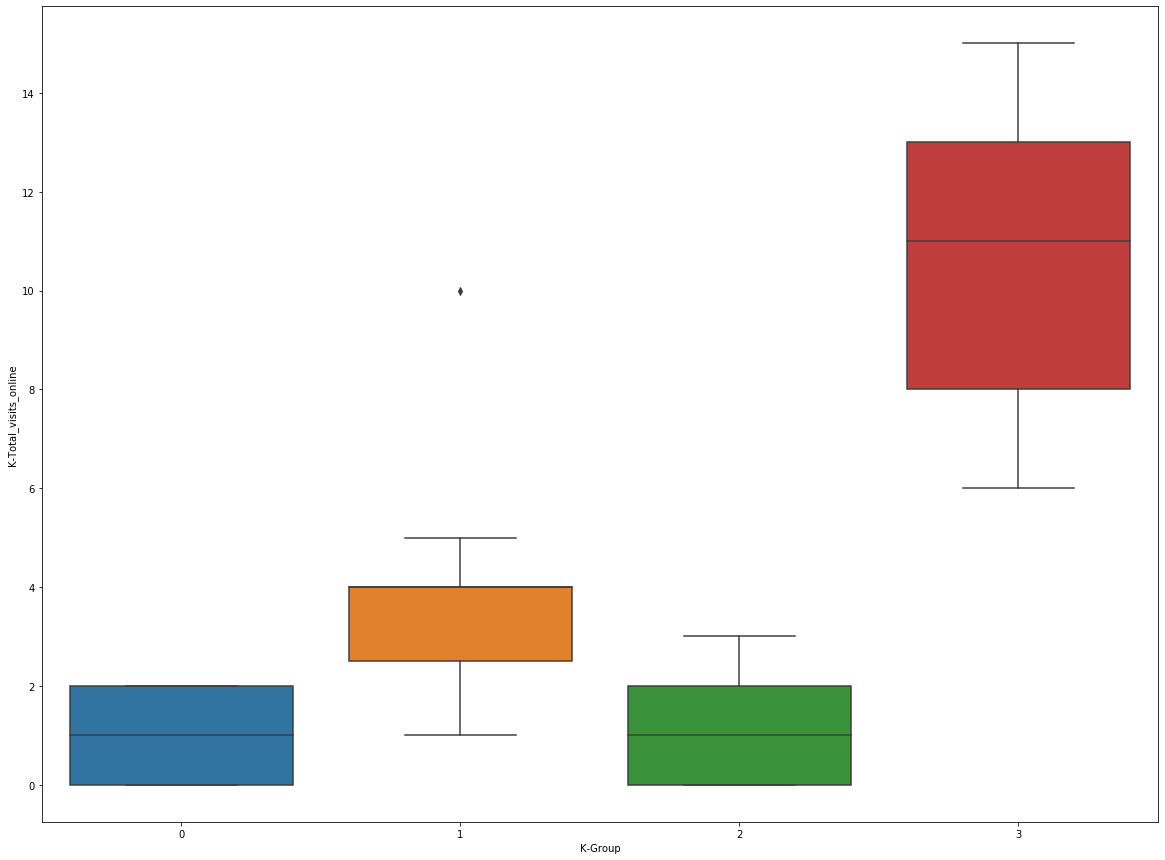

In [103]:
plt.figure(figsize=(20,15))
sns.boxplot(x = dfk4['K-Group'], y = dfk4['K-Total_visits_online'])
plt.show()

K-means Clustering        
Mean total online visits in descending order is as 3 > 1 > 0, 2. 
It is advisable to approach the cluster group 3 regarding their issues to improve servicability. 

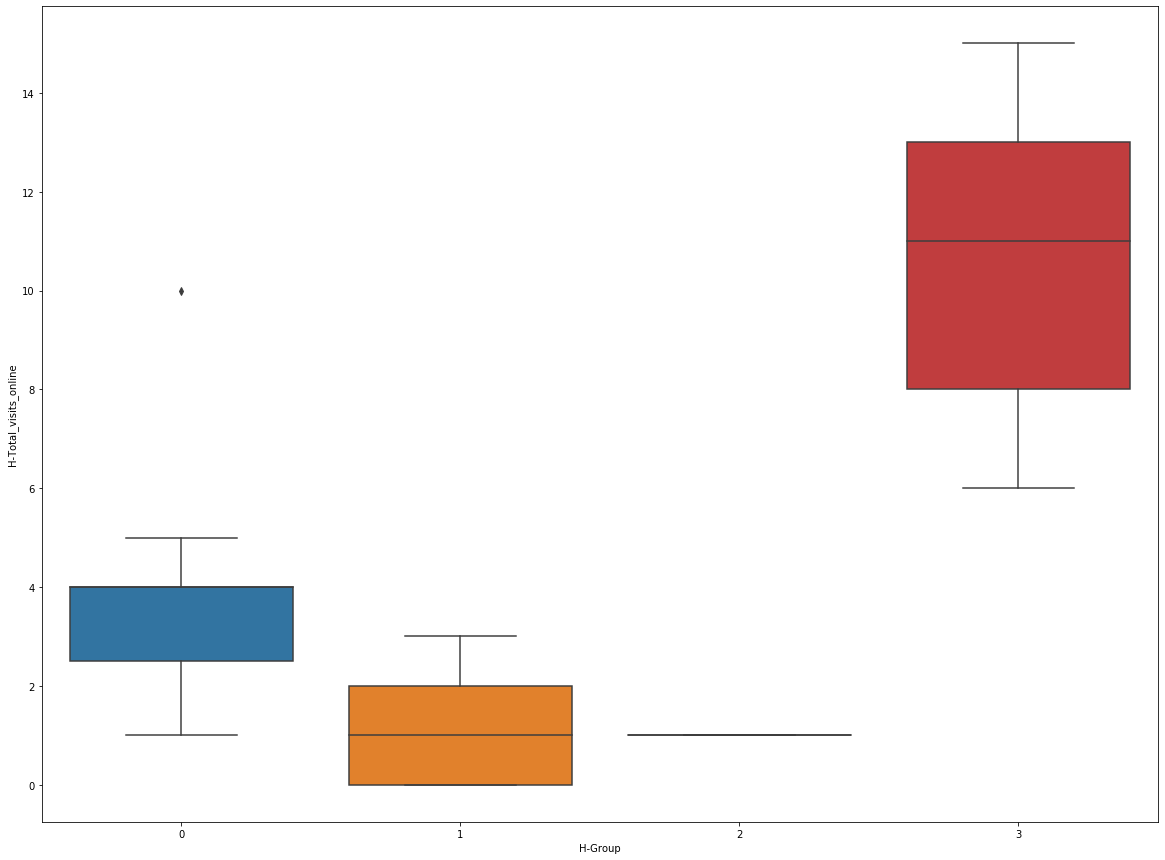

In [104]:
plt.figure(figsize=(20,15))
sns.boxplot(x = dfH4['H-Group'], y = dfH4['H-Total_visits_online'])
plt.show()

Heirarchial Clustering        
Mean total online visits in descending order is as 3 > 0 > 1, 2. 
It is advisable to approach the cluster group 3 regarding their issues to improve servicability. 

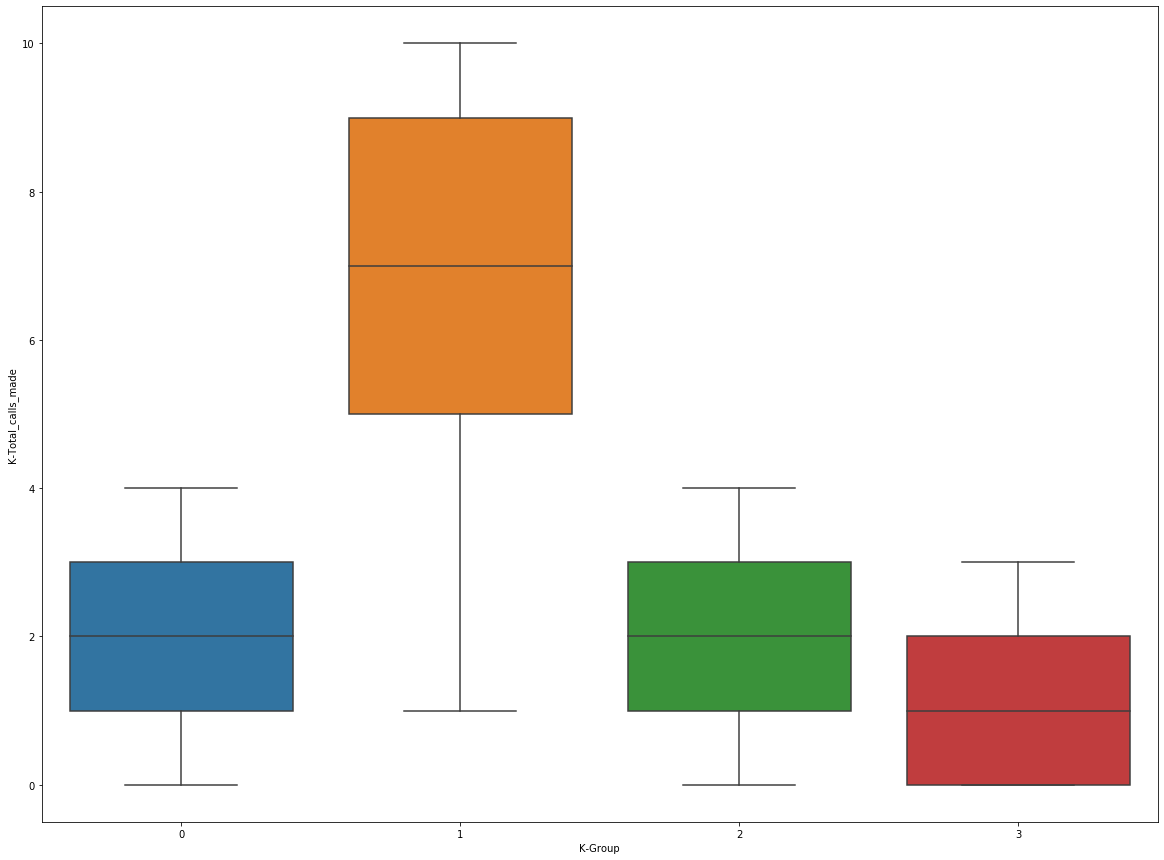

In [105]:
plt.figure(figsize=(20,15))
sns.boxplot(x = dfk4['K-Group'], y = dfk4['K-Total_calls_made'])
plt.show()

K-means Clustering        
Mean total calls made in descending order is as 1 > 0, 2 > 3. 
It is advisable to approach the cluster group 1 regarding their issues to improve servicability. 

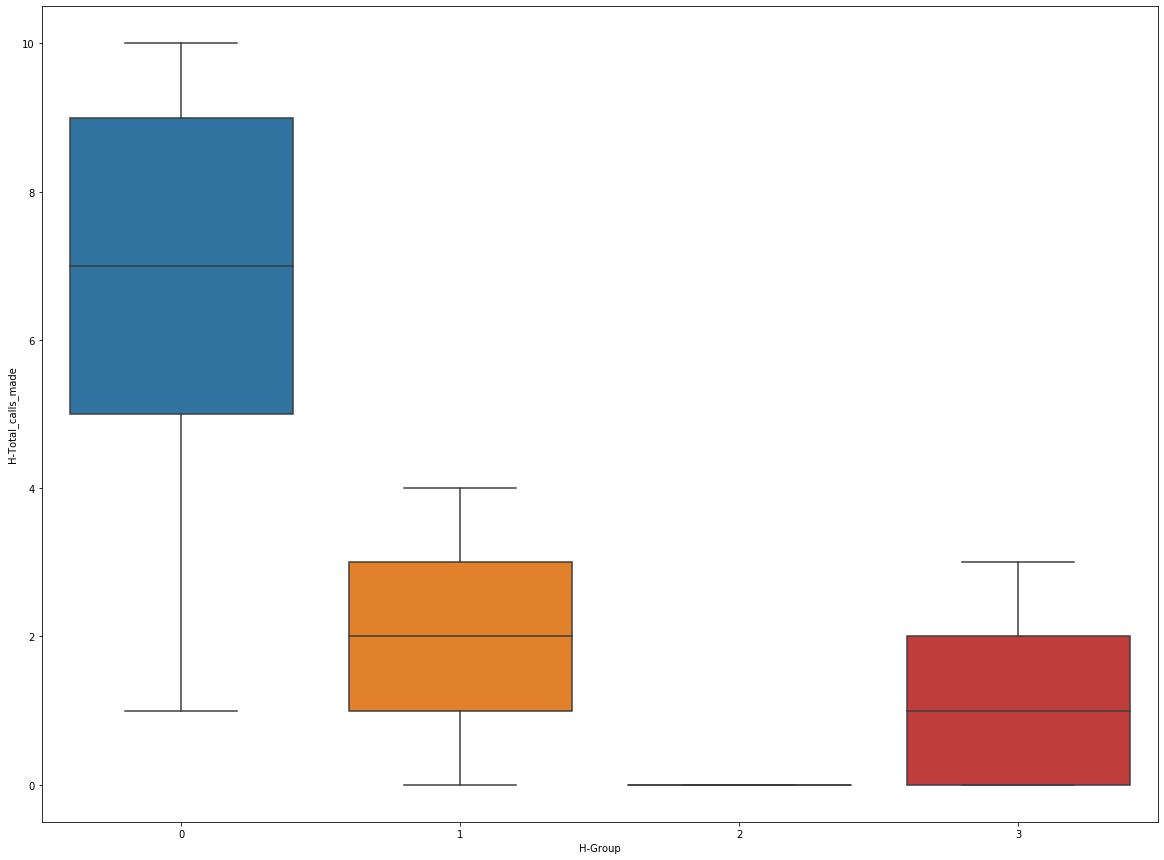

In [106]:
plt.figure(figsize=(20,15))
sns.boxplot(x = dfH4['H-Group'], y = dfH4['H-Total_calls_made'])
plt.show()

Heirarchial Clustering        
Mean total calls made in descending order is as 0 > 1 > 3 > 2. 
It is advisable to approach the cluster group 0 regarding their issues to improve servicability. 

### Final Comments:

#### K-means Clustering
1. Mean credit limit in descending order is as 3 > 2 > 0 > 1. It is advisable to approach the cluster group 0, 1 & 3 for new credit cards since they are having the low credit limits.
2. Mean total credit cards in descending order is as 3 > 2 > 0 > 1. It is advisable to approach the cluster group 1 for new credit cards since they are having the low total credit cards. 
3. Mean total bank visits in descending order is as 0 > 2 > 1 > 3. It is advisable to approach the cluster group 0 & 2 regarding their issues to improve servicability. 
4. Mean total online visits in descending order is as 3 > 1 > 0, 2. It is advisable to approach the cluster group 3 regarding their issues to improve servicability. 
5. Mean total calls made in descending order is as 1 > 0, 2 > 3. It is advisable to approach the cluster group 1 regarding their issues to improve servicability. 

#### Heirarchial Clustering
1. Mean credit limit in descending order is as 3 > 2 > 1 > 0. It is advisable to approach the cluster group 0, 1 & 2 for new credit cards since they are having the low credit limits.
2. Mean total credit cards in descending order is as 3 > 1 > 0,2. It is advisable to approach the cluster group 0, 2 for new credit cards since they are having the low total credit cards. 
3. Mean total bank visits in descending order is as 2 > 0, 1, 3. It is advisable to approach the cluster group 1 regarding their issues to improve servicability. 
4. Mean total online visits in descending order is as 3 > 0 > 1, 2. It is advisable to approach the cluster group 3 regarding their issues to improve servicability. 
5. Mean total calls made in descending order is as 0 > 1 > 3 > 2. It is advisable to approach the cluster group 0 regarding their issues to improve servicability. 
